In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [2]:
idxes = {"u10":0, "v10":1, "t2m":2, "t850":3, "z500":4}

In [3]:
# Open dataset
path = "../../data/out_of_sample/2022.h5"
ds = xr.open_dataset(path)

ls_mask = xr.DataArray(np.load("../../data/stats_v0/land_sea_mask.npy")[0:720,])

In [4]:
ds.fields

<xarray.DataArray 'fields' (phony_dim_0: 1460, phony_dim_1: 20,
                            phony_dim_2: 721, phony_dim_3: 1440)>
[30316608000 values with dtype=float32]
Dimensions without coordinates: phony_dim_0, phony_dim_1, phony_dim_2,
                                phony_dim_3

# Find reduced grid

35-75°N und von 12.5°W bis 42.5°E. \
Nina: 25° N - 80° N,  180° W - 60° W

In [5]:
#lat_range = np.arange(60, 220)
#lon_range = np.append(np.arange(1390, 1440), np.arange(0, 170))
lat_range = np.arange(40, 260)
lon_range = np.arange(720, 1200)

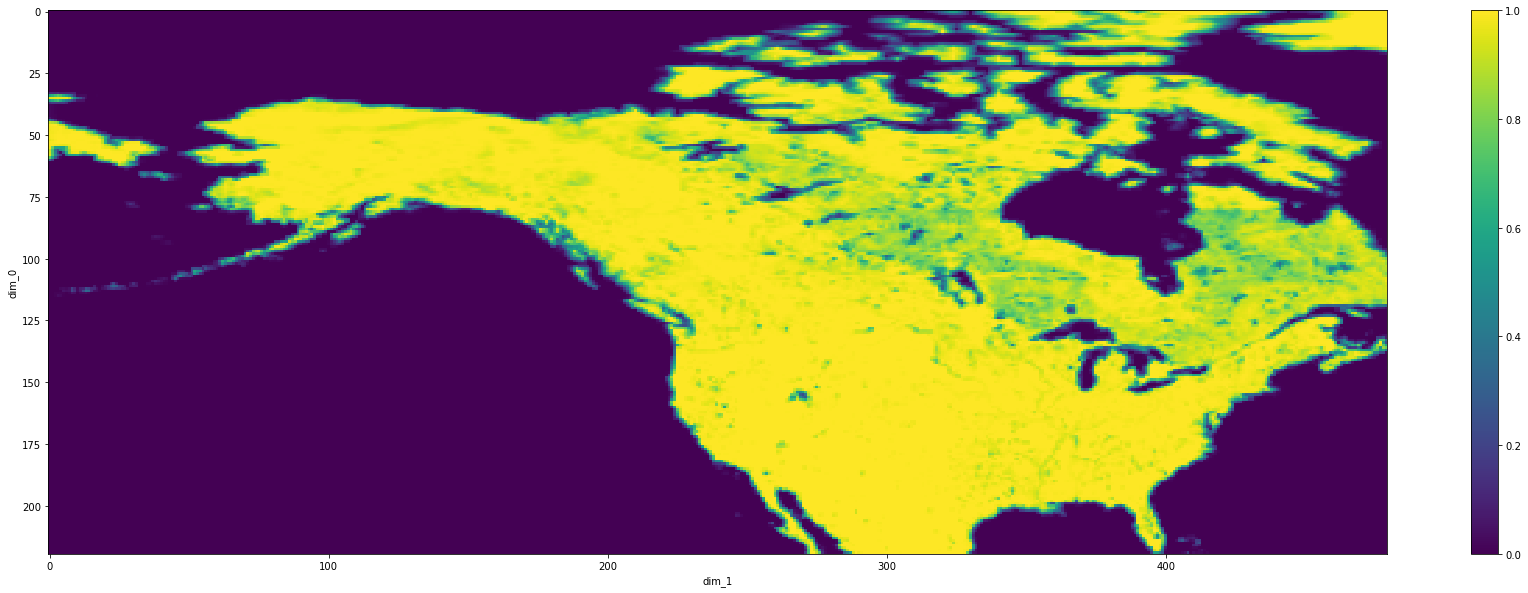

In [6]:
fig, axs = plt.subplots(figsize = (30,10))
ls_mask.isel(dim_0 = lat_range, dim_1 = lon_range).plot(yincrease = False)

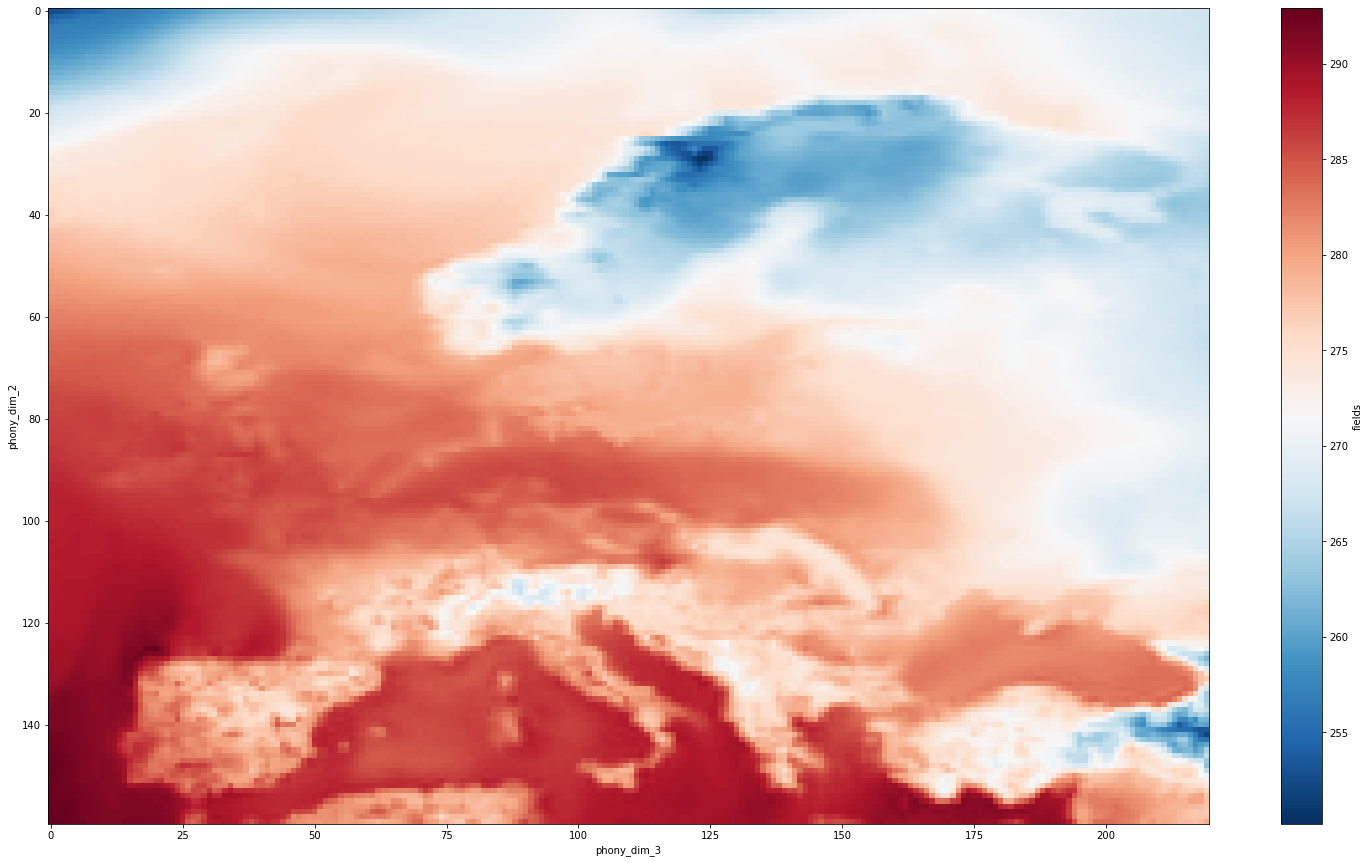

In [79]:
fig, axs = plt.subplots(figsize = (26,15))
im1 = ds.fields.isel(phony_dim_0 = 0, phony_dim_1 = 2, phony_dim_2 = lat_range, phony_dim_3 = lon_range).plot(cmap = "RdBu_r", yincrease = False)

# Calculate wind speed

In [27]:
wind_predicted = np.sqrt(np.power(predicted.isel(phony_dim_2 = idxes["u10"], phony_dim_5 = 0),2) + np.power(predicted.isel(phony_dim_2 = idxes["v10"], phony_dim_5 = 0),2))
wind_truth = np.sqrt(np.power(truth.isel(phony_dim_2 = idxes["u10"]),2) + np.power(truth.isel(phony_dim_2 = idxes["v10"]),2))

## Lead time 0 hours

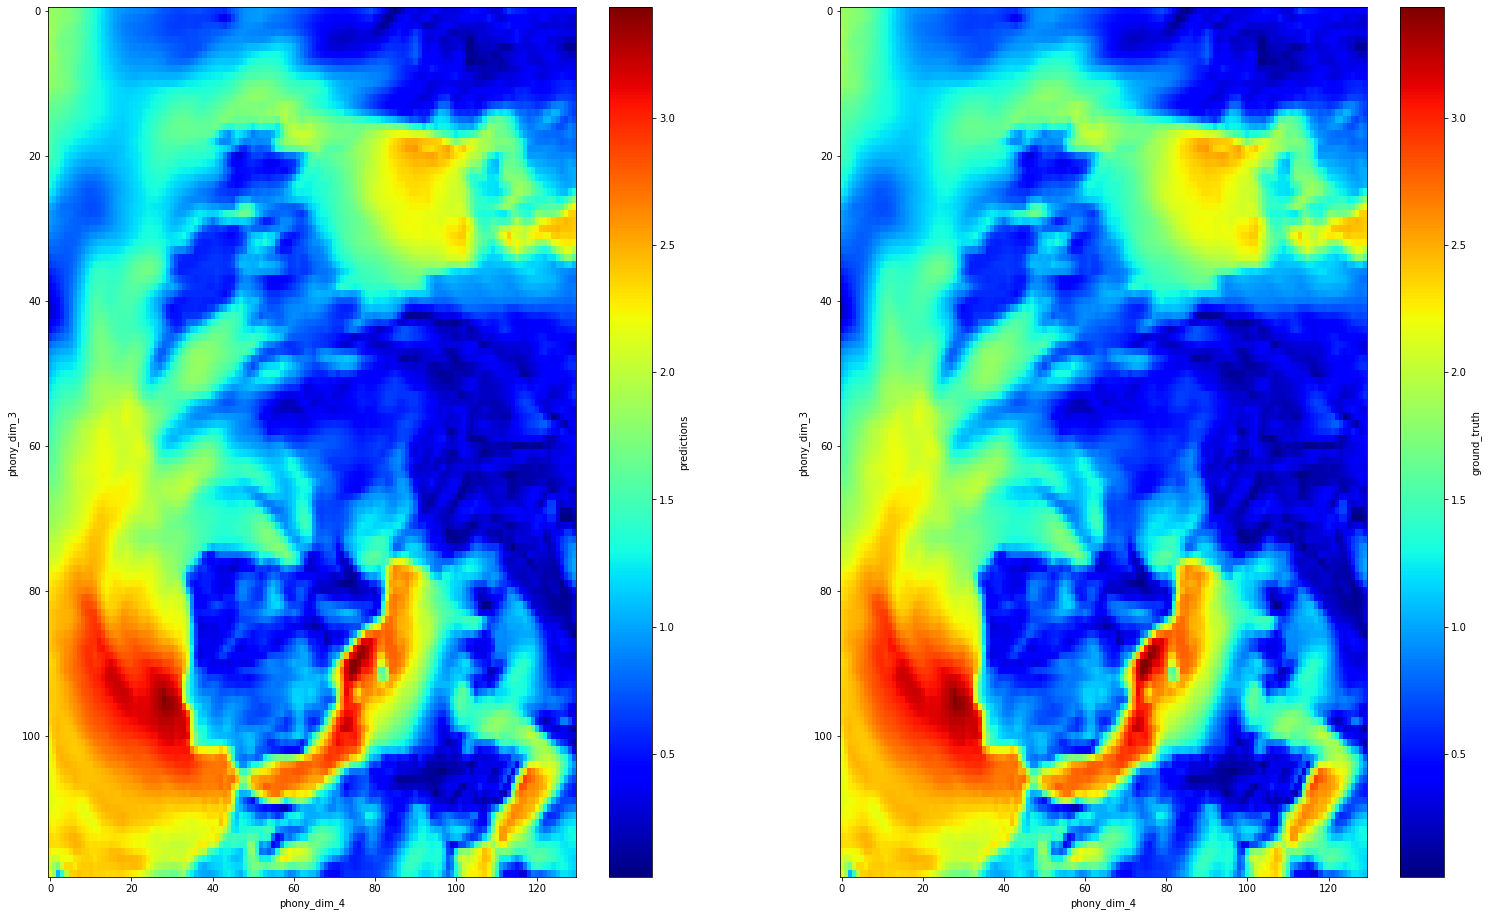

In [28]:
lead_time = 0

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (26,16))
im1 = wind_predicted.isel(phony_dim_0 = 100, phony_dim_1 = lead_time).plot(cmap = "jet", yincrease = False, ax = axs[0])
im2 = wind_truth.isel(phony_dim_0 = 100, phony_dim_1 = lead_time).plot(cmap = "jet", yincrease = False, ax = axs[1])

## Lead time 96 hours

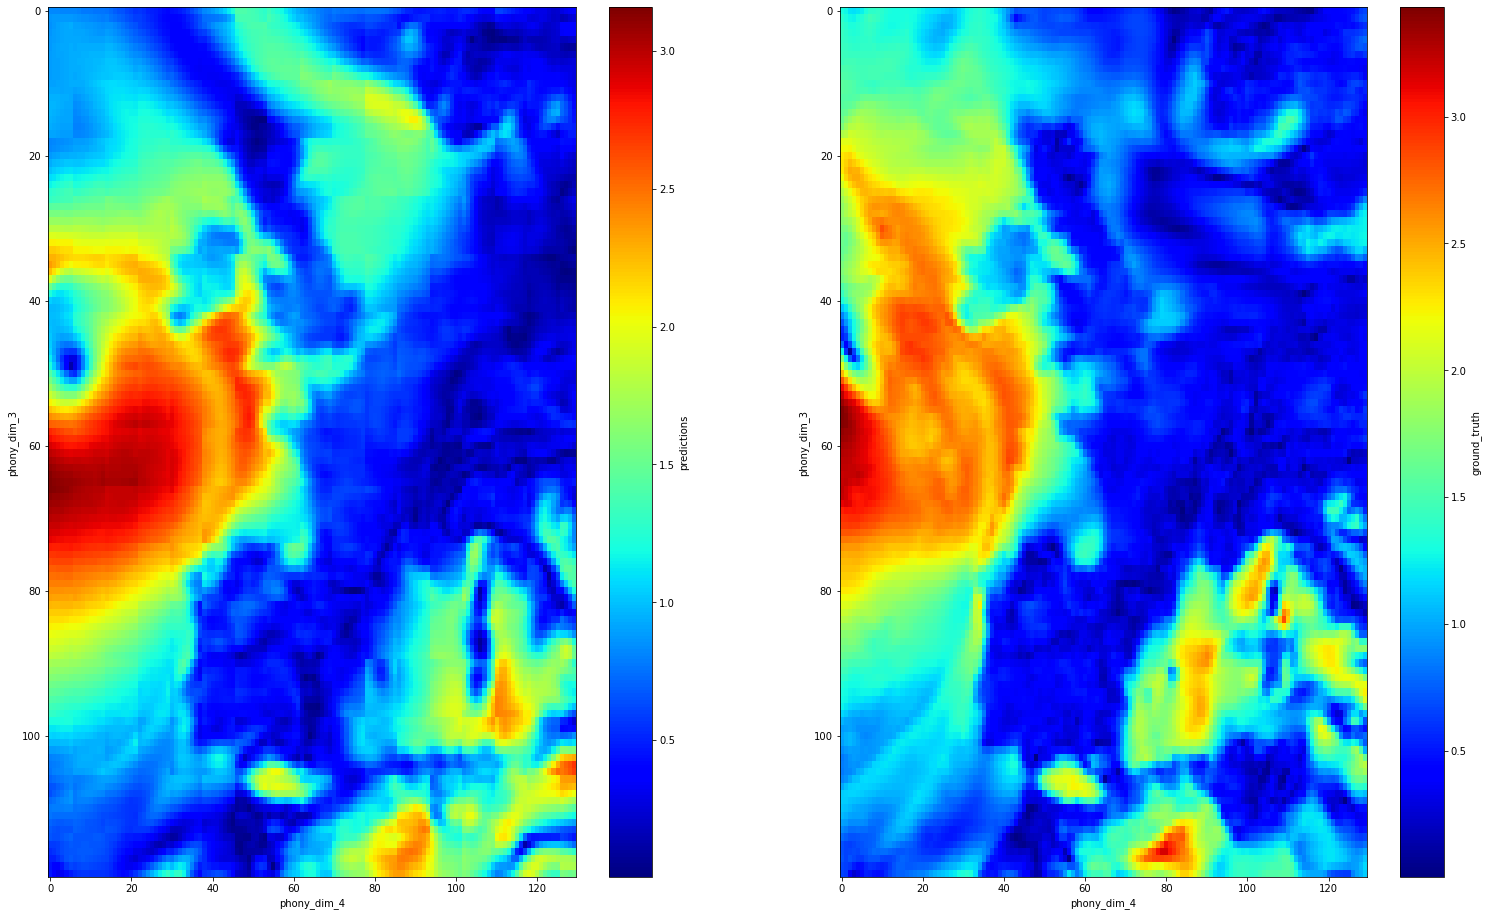

In [29]:
lead_time = 16

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (26,16))
im1 = wind_predicted.isel(phony_dim_0 = 100, phony_dim_1 = lead_time).plot(cmap = "jet", yincrease = False, ax = axs[0])
im2 = wind_truth.isel(phony_dim_0 = 100, phony_dim_1 = lead_time).plot(cmap = "jet", yincrease = False, ax = axs[1])

# Plot Temperature subset

In [6]:
idx = idxes["2m_temperature"]
lon_slice = slice(0,150)
lat_slice = slice(100,250)
temp_predicted = predicted.isel(phony_dim_0 = 0, phony_dim_2 = idx, phony_dim_3 = lat_slice, phony_dim_4 = lon_slice)  #Convert from kelvin
temp_truth = truth.isel(phony_dim_0 = 0, phony_dim_2 = idx, phony_dim_3 = lat_slice, phony_dim_4 = lon_slice)

## Lead time 0 hours

/tmp/ipykernel_4021361/957272691.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im1 = axs[0].pcolormesh(lon[lon_slice], lat[lat_slice], temp_truth.isel(phony_dim_1 = lead_time), cmap = "RdBu_r")
/tmp/ipykernel_4021361/957272691.py:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im2 = axs[1].pcolormesh(lon[lon_slice], lat[lat_slice], temp_predicted.isel(phony_dim_1 = lead_time), cmap = "RdBu_r")


Text(0, 0.5, 'Latitude')

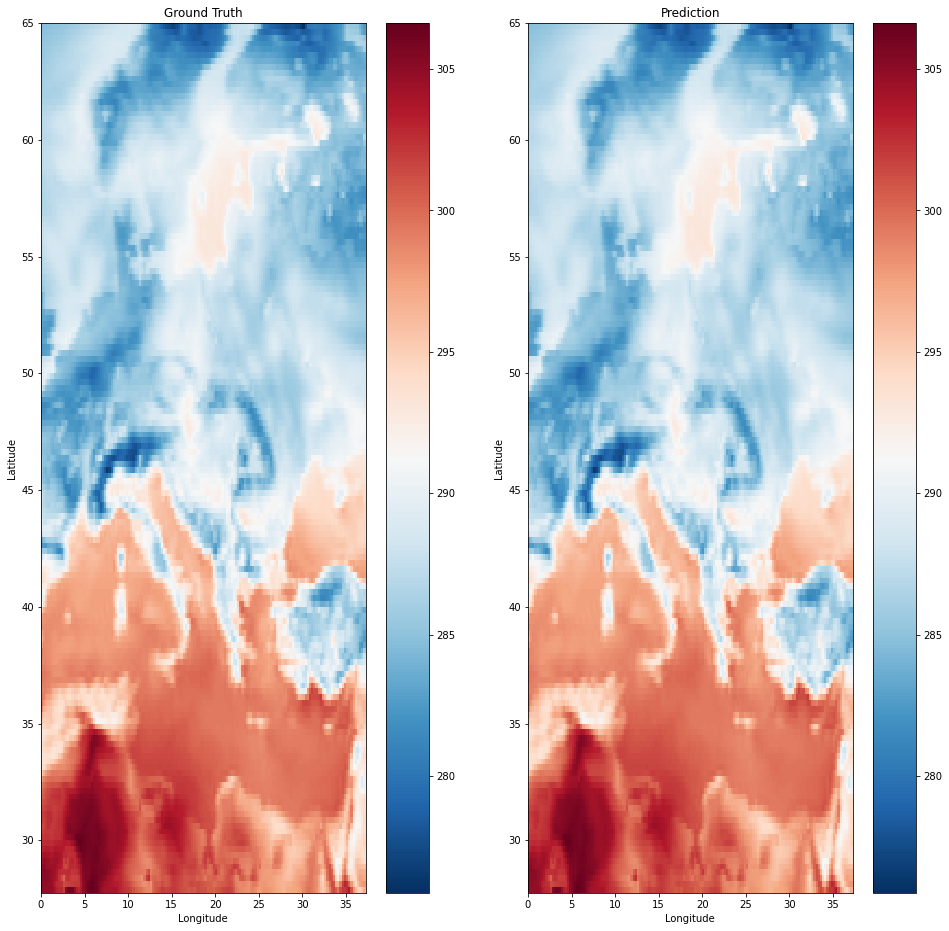

In [7]:
lead_time = 0

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (16,16))
im1 = axs[0].pcolormesh(lon[lon_slice], lat[lat_slice], temp_truth.isel(phony_dim_1 = lead_time), cmap = "RdBu_r")
fig.colorbar(im1, ax=axs[0])
axs[0].set_title("Ground Truth")
axs[0].set_xlabel("Longitude")
axs[0].set_ylabel("Latitude")
im2 = axs[1].pcolormesh(lon[lon_slice], lat[lat_slice], temp_predicted.isel(phony_dim_1 = lead_time), cmap = "RdBu_r")
fig.colorbar(im2, ax=axs[1])
axs[1].set_title("Prediction")
axs[1].set_xlabel("Longitude")
axs[1].set_ylabel("Latitude")

## Lead time 96 hours

/tmp/ipykernel_4021361/3450180461.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im1 = axs[0].pcolormesh(lon[lon_slice], lat[lat_slice], temp_truth.isel(phony_dim_1 = lead_time), cmap = "RdBu_r")
/tmp/ipykernel_4021361/3450180461.py:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im2 = axs[1].pcolormesh(lon[lon_slice], lat[lat_slice], temp_predicted.isel(phony_dim_1 = lead_time), cmap = "RdBu_r")


Text(0, 0.5, 'Latitude')

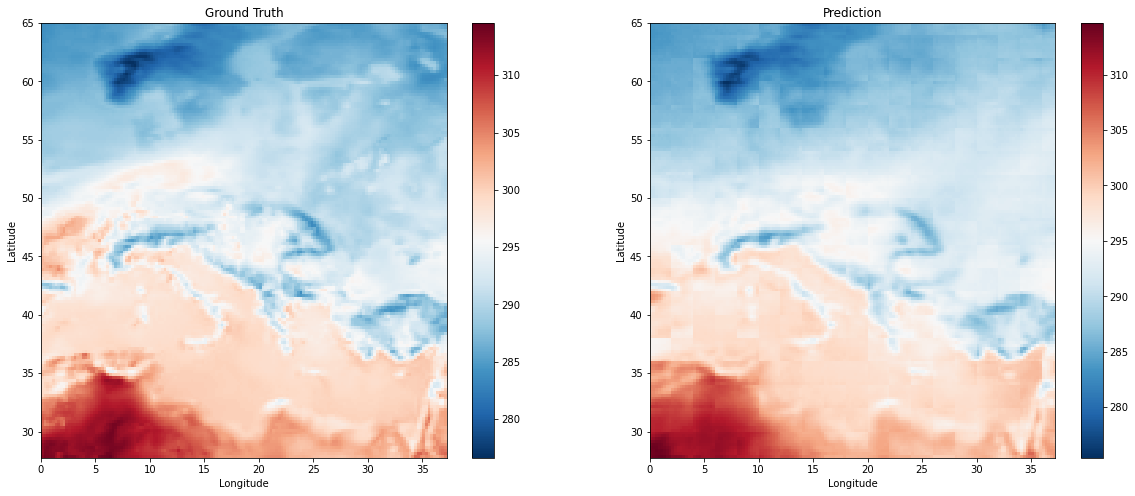

In [14]:
lead_time = 15

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (20,8))
im1 = axs[0].pcolormesh(lon[lon_slice], lat[lat_slice], temp_truth.isel(phony_dim_1 = lead_time), cmap = "RdBu_r")
fig.colorbar(im1, ax=axs[0])
axs[0].set_title("Ground Truth")
axs[0].set_xlabel("Longitude")
axs[0].set_ylabel("Latitude")
im2 = axs[1].pcolormesh(lon[lon_slice], lat[lat_slice], temp_predicted.isel(phony_dim_1 = lead_time), cmap = "RdBu_r")
fig.colorbar(im2, ax=axs[1])
axs[1].set_title("Prediction")
axs[1].set_xlabel("Longitude")
axs[1].set_ylabel("Latitude")